In [1]:
# load libraries for KMeans & Hierarchical Clustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data 
data_file = pd.read_excel('Data.xlsx')
data_file

,Bandara,Revenue Aero 2018,Revenue Non - Aero 2018,Pergerakan Penumpang 2018,Pergerakan Pesawat 2018,Revenue Aero 2019,Revenue Non - Aero 2019,Pergerakan Penumpang 2019,Pergerakan Pesawat 2019,Revenue Aero 2020,Revenue Non - Aero 2020,Pergerakan Penumpang 2020,Pergerakan Pesawat 2020
0,CGK,4.317424e+12,3.595244e+12,65667506.0,463069.0,4.219148e+12,4.049790e+12,54496625.0,390648.0,1516723541152,2626296548540,20557709,213043
1,KNO,7.063820e+11,2.745030e+11,10455953.0,80354.0,6.544335e+11,3.046860e+11,8064439.0,64691.0,243613196254,160388298189,3380450,35935
2,HLP,2.069661e+11,1.010080e+11,7446544.0,66798.0,1.747462e+11,1.164148e+11,6209227.0,62047.0,75208158668,70200668114,2085179,36152
3,PLM,1.490767e+11,9.280931e+10,5170911.0,45559.0,1.228771e+11,7.715224e+10,4021639.0,37254.0,53232904080,42158139805,1445328,17670
4,PKU,1.284270e+11,7.070546e+10,4139371.0,32936.0,1.440085e+11,6.401090e+10,3160082.0,27453.0,61784144028,44287072767,1427154,15404
5,PDG,1.061211e+11,4.624061e+10,4139952.0,29990.0,9.052373e+10,4.586227e+10,3073710.0,24111.0,43995120381,26045439499,1271716,12286
6,BDO,1.393359e+11,5.725067e+10,3860314.0,31865.0,9.405148e+10,4.999353e+10,2299943.0,24011.0,19883366716,20011808672,483295,9130
7,PNK,9.779696e+10,6.442331e+10,4208922.0,39655.0,8.541569e+10,5.994605e+10,3268779.0,29755.0,50276663080,35044389976,1434654,16553
8,PGK,3.398775e+10,3.548878e+10,2173097.0,21361.0,3.688218e+10,2.726215e+10,1645440.0,17471.0,16118167790,12171853248,673066,9592
9,DJB,6.970846e+10,3.330936e+10,1785810.0,17326.0,5.457377e+10,3.042159e+10,1395993.0,15333.0,22468427425,13354608870,557826,7841


Data Preparation Tahun 2018

In [3]:
# data selection (remove null)
x1 = data_file.iloc[0:14]
x1

,Bandara,Revenue Aero 2018,Revenue Non - Aero 2018,Pergerakan Penumpang 2018,Pergerakan Pesawat 2018,Revenue Aero 2019,Revenue Non - Aero 2019,Pergerakan Penumpang 2019,Pergerakan Pesawat 2019,Revenue Aero 2020,Revenue Non - Aero 2020,Pergerakan Penumpang 2020,Pergerakan Pesawat 2020
0,CGK,4.317424e+12,3.595244e+12,65667506.0,463069.0,4.219148e+12,4.049790e+12,54496625.0,390648.0,1516723541152,2626296548540,20557709,213043
1,KNO,7.063820e+11,2.745030e+11,10455953.0,80354.0,6.544335e+11,3.046860e+11,8064439.0,64691.0,243613196254,160388298189,3380450,35935
2,HLP,2.069661e+11,1.010080e+11,7446544.0,66798.0,1.747462e+11,1.164148e+11,6209227.0,62047.0,75208158668,70200668114,2085179,36152
3,PLM,1.490767e+11,9.280931e+10,5170911.0,45559.0,1.228771e+11,7.715224e+10,4021639.0,37254.0,53232904080,42158139805,1445328,17670
4,PKU,1.284270e+11,7.070546e+10,4139371.0,32936.0,1.440085e+11,6.401090e+10,3160082.0,27453.0,61784144028,44287072767,1427154,15404
5,PDG,1.061211e+11,4.624061e+10,4139952.0,29990.0,9.052373e+10,4.586227e+10,3073710.0,24111.0,43995120381,26045439499,1271716,12286
6,BDO,1.393359e+11,5.725067e+10,3860314.0,31865.0,9.405148e+10,4.999353e+10,2299943.0,24011.0,19883366716,20011808672,483295,9130
7,PNK,9.779696e+10,6.442331e+10,4208922.0,39655.0,8.541569e+10,5.994605e+10,3268779.0,29755.0,50276663080,35044389976,1434654,16553
8,PGK,3.398775e+10,3.548878e+10,2173097.0,21361.0,3.688218e+10,2.726215e+10,1645440.0,17471.0,16118167790,12171853248,673066,9592
9,DJB,6.970846e+10,3.330936e+10,1785810.0,17326.0,5.457377e+10,3.042159e+10,1395993.0,15333.0,22468427425,13354608870,557826,7841


In [4]:
# data selection (Tahun 2018)
x1 = x1.drop(['Revenue Aero 2019','Revenue Non - Aero 2019', 'Pergerakan Penumpang 2019','Pergerakan Pesawat 2019','Revenue Aero 2020', 'Revenue Non - Aero 2020','Pergerakan Penumpang 2020','Pergerakan Pesawat 2020'], axis = 1)
x1

,Bandara,Revenue Aero 2018,Revenue Non - Aero 2018,Pergerakan Penumpang 2018,Pergerakan Pesawat 2018
0,CGK,4.317424e+12,3.595244e+12,65667506.0,463069.0
1,KNO,7.063820e+11,2.745030e+11,10455953.0,80354.0
2,HLP,2.069661e+11,1.010080e+11,7446544.0,66798.0
3,PLM,1.490767e+11,9.280931e+10,5170911.0,45559.0
4,PKU,1.284270e+11,7.070546e+10,4139371.0,32936.0
5,PDG,1.061211e+11,4.624061e+10,4139952.0,29990.0
6,BDO,1.393359e+11,5.725067e+10,3860314.0,31865.0
7,PNK,9.779696e+10,6.442331e+10,4208922.0,39655.0
8,PGK,3.398775e+10,3.548878e+10,2173097.0,21361.0
9,DJB,6.970846e+10,3.330936e+10,1785810.0,17326.0


In [5]:
# data cleansing (remove outliers) (all data)

# find IQR
Q1 = np.percentile(data_file['Revenue Aero 2018'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data_file['Revenue Aero 2018'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
IQR

# find upper limit
upper = data_file['Revenue Aero 2018'] >= (Q3+1.5*IQR)
 
print("Upper bound:",upper)
print(np.where(upper))

# find lower limit
lower = data_file['Revenue Aero 2018'] <= (Q1-1.5*IQR)
print("Lower bound:", lower)
print(np.where(lower))

Upper bound: 0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
Name: Revenue Aero 2018, dtype: bool
(array([], dtype=int64),)
Lower bound: 0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
Name: Revenue Aero 2018, dtype: bool
(array([], dtype=int64),)


In [6]:
# data selection (remove columns "Bandara")
y1 = x1.drop("Bandara", axis = 1)
y1

,Revenue Aero 2018,Revenue Non - Aero 2018,Pergerakan Penumpang 2018,Pergerakan Pesawat 2018
0,4.317424e+12,3.595244e+12,65667506.0,463069.0
1,7.063820e+11,2.745030e+11,10455953.0,80354.0
2,2.069661e+11,1.010080e+11,7446544.0,66798.0
3,1.490767e+11,9.280931e+10,5170911.0,45559.0
4,1.284270e+11,7.070546e+10,4139371.0,32936.0
5,1.061211e+11,4.624061e+10,4139952.0,29990.0
6,1.393359e+11,5.725067e+10,3860314.0,31865.0
7,9.779696e+10,6.442331e+10,4208922.0,39655.0
8,3.398775e+10,3.548878e+10,2173097.0,21361.0
9,6.970846e+10,3.330936e+10,1785810.0,17326.0


In [7]:
# data transformation (table to array)
y1_array = np.array(y1)
y1_array

array([[4.31742390e+12, 3.59524448e+12, 6.56675060e+07, 4.63069000e+05],
       [7.06382044e+11, 2.74503007e+11, 1.04559530e+07, 8.03540000e+04],
       [2.06966065e+11, 1.01007971e+11, 7.44654400e+06, 6.67980000e+04],
       [1.49076711e+11, 9.28093079e+10, 5.17091100e+06, 4.55590000e+04],
       [1.28427048e+11, 7.07054555e+10, 4.13937100e+06, 3.29360000e+04],
       [1.06121083e+11, 4.62406107e+10, 4.13995200e+06, 2.99900000e+04],
       [1.39335881e+11, 5.72506661e+10, 3.86031400e+06, 3.18650000e+04],
       [9.77969649e+10, 6.44233078e+10, 4.20892200e+06, 3.96550000e+04],
       [3.39877513e+10, 3.54887802e+10, 2.17309700e+06, 2.13610000e+04],
       [6.97084600e+10, 3.33093590e+10, 1.78581000e+06, 1.73260000e+04],
       [3.86071592e+10, 1.47888863e+10, 1.27341500e+06, 1.05100000e+04],
       [8.66007965e+09, 5.90236728e+09, 3.87209000e+05, 5.44900000e+03],
       [3.54176404e+09, 1.04016431e+10, 4.25476000e+05, 4.87800000e+03],
       [3.84539398e+09, 1.89332326e+10, 3.19380000e

In [8]:
# standarisasi ukuran variabel array
from sklearn.preprocessing import MinMaxScaler #percentile
scaler = MinMaxScaler()
y1_scaled = scaler.fit_transform(y1_array)
y1_scaled # fnal data tahun 2018

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.62925239e-01, 7.48328334e-02, 1.55116506e-01, 1.64726064e-01],
       [4.71557393e-02, 2.64966673e-02, 1.09064551e-01, 1.35140149e-01],
       [3.37364216e-02, 2.42124986e-02, 7.42413180e-02, 8.87861176e-02],
       [2.89496283e-02, 1.80543081e-02, 5.84560145e-02, 6.12364713e-02],
       [2.37788876e-02, 1.12383390e-02, 5.84649053e-02, 5.48068382e-02],
       [3.14784021e-02, 1.43057689e-02, 5.41857007e-02, 5.88990181e-02],
       [2.18492759e-02, 1.63040854e-02, 5.95203296e-02, 7.59006615e-02],
       [7.05767711e-03, 8.24285119e-03, 2.83667966e-02, 3.59740807e-02],
       [1.53380862e-02, 7.63565880e-03, 2.24402763e-02, 2.71677095e-02],
       [8.12850098e-03, 2.47580719e-03, 1.45992710e-02, 1.22918172e-02],
       [1.18647553e-03, 0.00000000e+00, 1.03796397e-03, 1.24620519e-03],
       [0.00000000e+00, 1.25350990e-03, 1.62355077e-03, 0.00000000e+00],
       [7.03843849e-05, 3.63043279e-03, 0.00000000e

Data Preparation 2019

In [9]:
# data selection (remove null)
x2 = data_file.iloc[0:15]
x2

,Bandara,Revenue Aero 2018,Revenue Non - Aero 2018,Pergerakan Penumpang 2018,Pergerakan Pesawat 2018,Revenue Aero 2019,Revenue Non - Aero 2019,Pergerakan Penumpang 2019,Pergerakan Pesawat 2019,Revenue Aero 2020,Revenue Non - Aero 2020,Pergerakan Penumpang 2020,Pergerakan Pesawat 2020
0,CGK,4.317424e+12,3.595244e+12,65667506.0,463069.0,4.219148e+12,4.049790e+12,54496625.0,390648.0,1516723541152,2626296548540,20557709,213043
1,KNO,7.063820e+11,2.745030e+11,10455953.0,80354.0,6.544335e+11,3.046860e+11,8064439.0,64691.0,243613196254,160388298189,3380450,35935
2,HLP,2.069661e+11,1.010080e+11,7446544.0,66798.0,1.747462e+11,1.164148e+11,6209227.0,62047.0,75208158668,70200668114,2085179,36152
3,PLM,1.490767e+11,9.280931e+10,5170911.0,45559.0,1.228771e+11,7.715224e+10,4021639.0,37254.0,53232904080,42158139805,1445328,17670
4,PKU,1.284270e+11,7.070546e+10,4139371.0,32936.0,1.440085e+11,6.401090e+10,3160082.0,27453.0,61784144028,44287072767,1427154,15404
5,PDG,1.061211e+11,4.624061e+10,4139952.0,29990.0,9.052373e+10,4.586227e+10,3073710.0,24111.0,43995120381,26045439499,1271716,12286
6,BDO,1.393359e+11,5.725067e+10,3860314.0,31865.0,9.405148e+10,4.999353e+10,2299943.0,24011.0,19883366716,20011808672,483295,9130
7,PNK,9.779696e+10,6.442331e+10,4208922.0,39655.0,8.541569e+10,5.994605e+10,3268779.0,29755.0,50276663080,35044389976,1434654,16553
8,PGK,3.398775e+10,3.548878e+10,2173097.0,21361.0,3.688218e+10,2.726215e+10,1645440.0,17471.0,16118167790,12171853248,673066,9592
9,DJB,6.970846e+10,3.330936e+10,1785810.0,17326.0,5.457377e+10,3.042159e+10,1395993.0,15333.0,22468427425,13354608870,557826,7841


In [10]:
# data selection (Tahun 2019)
x2 = x2.drop(['Revenue Aero 2018','Revenue Non - Aero 2018', 'Pergerakan Penumpang 2018','Pergerakan Pesawat 2018','Revenue Aero 2020', 'Revenue Non - Aero 2020','Pergerakan Penumpang 2020','Pergerakan Pesawat 2020'], axis = 1)
x2

,Bandara,Revenue Aero 2019,Revenue Non - Aero 2019,Pergerakan Penumpang 2019,Pergerakan Pesawat 2019
0,CGK,4.219148e+12,4.049790e+12,54496625.0,390648.0
1,KNO,6.544335e+11,3.046860e+11,8064439.0,64691.0
2,HLP,1.747462e+11,1.164148e+11,6209227.0,62047.0
3,PLM,1.228771e+11,7.715224e+10,4021639.0,37254.0
4,PKU,1.440085e+11,6.401090e+10,3160082.0,27453.0
5,PDG,9.052373e+10,4.586227e+10,3073710.0,24111.0
6,BDO,9.405148e+10,4.999353e+10,2299943.0,24011.0
7,PNK,8.541569e+10,5.994605e+10,3268779.0,29755.0
8,PGK,3.688218e+10,2.726215e+10,1645440.0,17471.0
9,DJB,5.457377e+10,3.042159e+10,1395993.0,15333.0


In [11]:
# data cleansing (remove outliers) (all data)

# find IQR
Q1 = np.percentile(data_file['Revenue Aero 2019'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data_file['Revenue Aero 2019'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
IQR

# find upper limit
upper = data_file['Revenue Aero 2019'] >= (Q3+1.5*IQR)
 
print("Upper bound:",upper)
print(np.where(upper))

# find lower limit
lower = data_file['Revenue Aero 2019'] <= (Q1-1.5*IQR)
print("Lower bound:", lower)
print(np.where(lower))

Upper bound: 0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
Name: Revenue Aero 2019, dtype: bool
(array([], dtype=int64),)
Lower bound: 0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
Name: Revenue Aero 2019, dtype: bool
(array([], dtype=int64),)


In [12]:
# data selection (remove columns "Bandara")
y2 = x2.drop("Bandara", axis = 1)
y2

,Revenue Aero 2019,Revenue Non - Aero 2019,Pergerakan Penumpang 2019,Pergerakan Pesawat 2019
0,4.219148e+12,4.049790e+12,54496625.0,390648.0
1,6.544335e+11,3.046860e+11,8064439.0,64691.0
2,1.747462e+11,1.164148e+11,6209227.0,62047.0
3,1.228771e+11,7.715224e+10,4021639.0,37254.0
4,1.440085e+11,6.401090e+10,3160082.0,27453.0
5,9.052373e+10,4.586227e+10,3073710.0,24111.0
6,9.405148e+10,4.999353e+10,2299943.0,24011.0
7,8.541569e+10,5.994605e+10,3268779.0,29755.0
8,3.688218e+10,2.726215e+10,1645440.0,17471.0
9,5.457377e+10,3.042159e+10,1395993.0,15333.0


In [13]:
# data transformation (table to array)
y2_array = np.array(y2)
y2_array

array([[4.21914848e+12, 4.04978975e+12, 5.44966250e+07, 3.90648000e+05],
       [6.54433487e+11, 3.04686013e+11, 8.06443900e+06, 6.46910000e+04],
       [1.74746216e+11, 1.16414789e+11, 6.20922700e+06, 6.20470000e+04],
       [1.22877051e+11, 7.71522449e+10, 4.02163900e+06, 3.72540000e+04],
       [1.44008528e+11, 6.40108973e+10, 3.16008200e+06, 2.74530000e+04],
       [9.05237337e+10, 4.58622745e+10, 3.07371000e+06, 2.41110000e+04],
       [9.40514838e+10, 4.99935288e+10, 2.29994300e+06, 2.40110000e+04],
       [8.54156894e+10, 5.99460461e+10, 3.26877900e+06, 2.97550000e+04],
       [3.68821788e+10, 2.72621526e+10, 1.64544000e+06, 1.74710000e+04],
       [5.45737665e+10, 3.04215946e+10, 1.39599300e+06, 1.53330000e+04],
       [4.49375694e+10, 1.68259204e+10, 1.10678200e+06, 9.27900000e+03],
       [8.25858864e+09, 7.19038305e+09, 3.07614000e+05, 4.66900000e+03],
       [1.26207475e+10, 1.24831696e+10, 3.76797000e+05, 3.73200000e+03],
       [3.25359066e+09, 2.03320703e+10, 2.77101000e

In [14]:
# standarisasi ukuran variabel array
from sklearn.preprocessing import MinMaxScaler #percentile
scaler = MinMaxScaler()
y2_scaled = scaler.fit_transform(y2_array)
y2_scaled # fnal data tahun 2019

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.54458286e-01, 7.35901837e-02, 1.43626086e-01, 1.57550993e-01],
       [4.06776331e-02, 2.70183603e-02, 1.09409408e-01, 1.50717468e-01],
       [2.83743935e-02, 1.73061576e-02, 6.90625392e-02, 8.66389604e-02],
       [3.33867283e-02, 1.40554403e-02, 5.31723775e-02, 6.13078808e-02],
       [2.07002654e-02, 9.56609544e-03, 5.15793720e-02, 5.26703471e-02],
       [2.15370391e-02, 1.05880256e-02, 3.73083688e-02, 5.24118930e-02],
       [1.94886497e-02, 1.30499360e-02, 5.51771351e-02, 6.72574926e-02],
       [7.97661922e-03, 4.96506521e-03, 2.52370161e-02, 3.55089994e-02],
       [1.21730207e-02, 5.74660249e-03, 2.06363302e-02, 2.99832522e-02],
       [9.88733824e-03, 2.38350043e-03, 1.53022553e-02, 1.43364451e-02],
       [1.18717333e-03, 0.00000000e+00, 5.62767759e-04, 2.42171427e-03],
       [2.22186679e-03, 1.30925330e-03, 1.83874724e-03, 0.00000000e+00],
       [0.00000000e+00, 3.25080129e-03, 0.00000000e

Data Preparation 2020

In [15]:
# data selection (Tahun 2020)
x3 = data_file.drop(['Revenue Aero 2018','Revenue Non - Aero 2018', 'Pergerakan Penumpang 2018','Pergerakan Pesawat 2018','Revenue Aero 2019', 'Revenue Non - Aero 2019','Pergerakan Penumpang 2019','Pergerakan Pesawat 2019'], axis = 1)
x3

,Bandara,Revenue Aero 2020,Revenue Non - Aero 2020,Pergerakan Penumpang 2020,Pergerakan Pesawat 2020
0,CGK,1516723541152,2626296548540,20557709,213043
1,KNO,243613196254,160388298189,3380450,35935
2,HLP,75208158668,70200668114,2085179,36152
3,PLM,53232904080,42158139805,1445328,17670
4,PKU,61784144028,44287072767,1427154,15404
5,PDG,43995120381,26045439499,1271716,12286
6,BDO,19883366716,20011808672,483295,9130
7,PNK,50276663080,35044389976,1434654,16553
8,PGK,16118167790,12171853248,673066,9592
9,DJB,22468427425,13354608870,557826,7841


In [16]:
# data cleansing (remove outliers) (all data)

# find IQR
Q1 = np.percentile(data_file['Revenue Aero 2020'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data_file['Revenue Aero 2020'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
IQR

# find upper limit
upper = data_file['Revenue Aero 2020'] >= (Q3+1.5*IQR)
 
print("Upper bound:",upper)
print(np.where(upper))

# find lower limit
lower = data_file['Revenue Aero 2020'] <= (Q1-1.5*IQR)
print("Lower bound:", lower)
print(np.where(lower))

Upper bound: 0      True
1      True
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
Name: Revenue Aero 2020, dtype: bool
(array([0, 1], dtype=int64),)
Lower bound: 0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
Name: Revenue Aero 2020, dtype: bool
(array([], dtype=int64),)


In [17]:
# data cleansing (remove outliers)
x3 = x3.iloc[2:]
x3

,Bandara,Revenue Aero 2020,Revenue Non - Aero 2020,Pergerakan Penumpang 2020,Pergerakan Pesawat 2020
2,HLP,75208158668,70200668114,2085179,36152
3,PLM,53232904080,42158139805,1445328,17670
4,PKU,61784144028,44287072767,1427154,15404
5,PDG,43995120381,26045439499,1271716,12286
6,BDO,19883366716,20011808672,483295,9130
7,PNK,50276663080,35044389976,1434654,16553
8,PGK,16118167790,12171853248,673066,9592
9,DJB,22468427425,13354608870,557826,7841
10,BTJ,13493971043,14178402926,381263,4201
11,TNJ,4122742971,4280844786,120021,2433


In [18]:
# data selection (remove columns "Bandara" & reset index)
y3 = x3.drop("Bandara", axis = 1)
y3

,Revenue Aero 2020,Revenue Non - Aero 2020,Pergerakan Penumpang 2020,Pergerakan Pesawat 2020
2,75208158668,70200668114,2085179,36152
3,53232904080,42158139805,1445328,17670
4,61784144028,44287072767,1427154,15404
5,43995120381,26045439499,1271716,12286
6,19883366716,20011808672,483295,9130
7,50276663080,35044389976,1434654,16553
8,16118167790,12171853248,673066,9592
9,22468427425,13354608870,557826,7841
10,13493971043,14178402926,381263,4201
11,4122742971,4280844786,120021,2433


In [19]:
# data transformation (table to array)
y3_array = np.array(y3)
y3_array

array([[75208158668, 70200668114,     2085179,       36152],
       [53232904080, 42158139805,     1445328,       17670],
       [61784144028, 44287072767,     1427154,       15404],
       [43995120381, 26045439499,     1271716,       12286],
       [19883366716, 20011808672,      483295,        9130],
       [50276663080, 35044389976,     1434654,       16553],
       [16118167790, 12171853248,      673066,        9592],
       [22468427425, 13354608870,      557826,        7841],
       [13493971043, 14178402926,      381263,        4201],
       [ 4122742971,  4280844786,      120021,        2433],
       [ 5653126075,  5031143236,      182703,        2033],
       [ 3093014106, 10102716526,      110193,        2697],
       [ 7748246113, 22639291564,      411214,        9427],
       [ 6932100672,  4845049142,      314124,        4456],
       [ 9393477295,  6170676201,      339231,        4160],
       [17458213571,  8042135978,      570531,        7831]], dtype=int64)

In [20]:
# standarisasi ukuran variabel array
from sklearn.preprocessing import MinMaxScaler #percentile
scaler = MinMaxScaler()
y3_scaled = scaler.fit_transform(y3_array)
y3_scaled # fnal data tahun 2020
# diganti indeks ke 0 - 15

array([[1.        , 1.        , 1.        , 1.        ],
       [0.69527546, 0.57459643, 0.67602251, 0.45830769],
       [0.81385304, 0.60689222, 0.66682042, 0.39189308],
       [0.56717776, 0.33016767, 0.58811708, 0.30050705],
       [0.232827  , 0.23863783, 0.18891374, 0.20800727],
       [0.65428211, 0.46668124, 0.67061792, 0.42556933],
       [0.18061607, 0.11970615, 0.28500101, 0.22154811],
       [0.26867329, 0.13764849, 0.22665123, 0.17022773],
       [0.14422708, 0.1501454 , 0.13725161, 0.06354231],
       [0.01427895, 0.        , 0.00497624, 0.01172367],
       [0.03550034, 0.01138199, 0.03671418, 0.        ],
       [0.        , 0.08831747, 0.        , 0.0194613 ],
       [0.06455277, 0.2784966 , 0.15241678, 0.2167121 ],
       [0.05323551, 0.00855895, 0.10325693, 0.07101615],
       [0.08736671, 0.02866864, 0.11596943, 0.06234063],
       [0.1991981 , 0.05705858, 0.23308418, 0.16993464]])

Clustering KMeans (2018)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


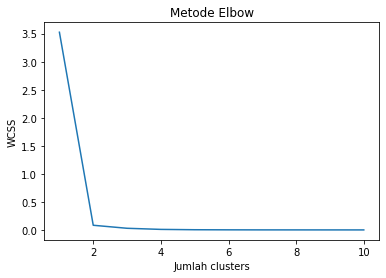

In [21]:
# menggunakan metode elbow untuk menentukan angka cluster tepat (KMeans)
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 123)
    kmeans.fit(y1_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS')
plt.show()

In [68]:
# proses kmeans
kmeans = KMeans (n_clusters = 3, init='k-means++', random_state = 123) #random_state tidak mengaruh hasil
y1_kmeans = kmeans.fit_predict(y1_scaled)
hasil_klaster = x1.copy()
hasil_klaster['Cluster'] = kmeans.labels_
hasil_klaster

,Bandara,Revenue Aero 2018,Revenue Non - Aero 2018,Pergerakan Penumpang 2018,Pergerakan Pesawat 2018,Cluster
0,CGK,4.317424e+12,3.595244e+12,65667506.0,463069.0,1
1,KNO,7.063820e+11,2.745030e+11,10455953.0,80354.0,2
2,HLP,2.069661e+11,1.010080e+11,7446544.0,66798.0,2
3,PLM,1.490767e+11,9.280931e+10,5170911.0,45559.0,0
4,PKU,1.284270e+11,7.070546e+10,4139371.0,32936.0,0
5,PDG,1.061211e+11,4.624061e+10,4139952.0,29990.0,0
6,BDO,1.393359e+11,5.725067e+10,3860314.0,31865.0,0
7,PNK,9.779696e+10,6.442331e+10,4208922.0,39655.0,0
8,PGK,3.398775e+10,3.548878e+10,2173097.0,21361.0,0
9,DJB,6.970846e+10,3.330936e+10,1785810.0,17326.0,0


In [69]:
# va;idasi hasil cluster
from sklearn.metrics import silhouette_score
score = silhouette_score(y1_scaled, kmeans.labels_, metric='euclidean')
print(score)

0.5655006424310047


In [23]:
# nilai centroid
c2018 = kmeans.cluster_centers_
c2018
center2018 = pd.DataFrame(c2018)
print(center2018) #nilai normal
# balik ke nilai asli
dc2018 = scaler.inverse_transform(center2018)
dc2018 #nilai asli
dc2018a = pd.DataFrame(dc2018,
                       columns=['Revenue Aero 2018', 'Revenue Non - Aero 2018', 
                                'Pergerakan Penumpang 2018', 'Pergerakan Pesawat 2018'])     
dc2018a

          0         1         2         3
0  0.015598  0.009759  0.033903  0.038294
1  1.000000  1.000000  1.000000  1.000000
2  0.105040  0.050665  0.132091  0.149933


,Revenue Aero 2018,Revenue Non - Aero 2018,Pergerakan Penumpang 2018,Pergerakan Pesawat 2018
0,4.217838e+09,4.924182e+09,1.771515e+05,3339.562276
1,7.520816e+10,7.020067e+10,2.085179e+06,36152.000000
2,1.066802e+10,7.620656e+09,3.710699e+05,7148.567661


Clustering KMeans (2019)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


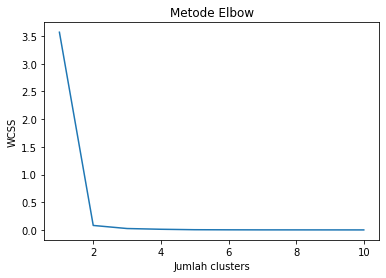

In [24]:
# menggunakan metode elbow untuk menentukan angka cluster tepat (KMeans)
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 456)
    kmeans.fit(y2_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS')
plt.show()

In [25]:
# proses kmeans
kmeans = KMeans (n_clusters = 3, init='k-means++', random_state = 456) #random_state tidak mengaruh hasil
y1_kmeans = kmeans.fit_predict(y2_scaled)
hasil_klaster = x2.copy()
hasil_klaster['Cluster'] = kmeans.labels_
hasil_klaster

,Bandara,Revenue Aero 2019,Revenue Non - Aero 2019,Pergerakan Penumpang 2019,Pergerakan Pesawat 2019,Cluster
0,CGK,4.219148e+12,4.049790e+12,54496625.0,390648.0,1
1,KNO,6.544335e+11,3.046860e+11,8064439.0,64691.0,2
2,HLP,1.747462e+11,1.164148e+11,6209227.0,62047.0,2
3,PLM,1.228771e+11,7.715224e+10,4021639.0,37254.0,0
4,PKU,1.440085e+11,6.401090e+10,3160082.0,27453.0,0
5,PDG,9.052373e+10,4.586227e+10,3073710.0,24111.0,0
6,BDO,9.405148e+10,4.999353e+10,2299943.0,24011.0,0
7,PNK,8.541569e+10,5.994605e+10,3268779.0,29755.0,0
8,PGK,3.688218e+10,2.726215e+10,1645440.0,17471.0,0
9,DJB,5.457377e+10,3.042159e+10,1395993.0,15333.0,0


In [26]:
# nilai centroid
c2019 = kmeans.cluster_centers_
c2019
center2019 = pd.DataFrame(c2019)
print(center2019) #nilai normal
# balik ke nilai asli
dc2019 = scaler.inverse_transform(center2019)
dc2019 #nilai asli
dc2019a = pd.DataFrame(dc2019,
                       columns=['Revenue Aero 2019', 'Revenue Non - Aero 2019', 
                                'Pergerakan Penumpang 2019', 'Pergerakan Pesawat 2019'])
dc2019a

          0         1         2         3
0  0.013287  0.007045  0.028013  0.036651
1  1.000000  1.000000  1.000000  1.000000
2  0.097568  0.050304  0.126518  0.154134


,Revenue Aero 2019,Revenue Non - Aero 2019,Pergerakan Penumpang 2019,Pergerakan Pesawat 2019
0,4.051214e+09,4.745231e+09,1.655177e+05,3283.507963
1,7.520816e+10,7.020067e+10,2.085179e+06,36152.000000
2,1.012914e+10,7.596894e+09,3.600638e+05,7291.905817


Clustering KMeans 2020

C:\Users\asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


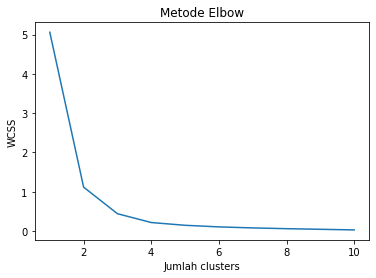

In [27]:
# menggunakan metode elbow untuk menentukan angka cluster tepat (KMeans)
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 789)
    kmeans.fit(y3_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS')
plt.show()

In [28]:
# proses kmeans
kmeans = KMeans (n_clusters = 4, init='k-means++', random_state = 789) #random_state tidak mengaruh hasil
y1_kmeans = kmeans.fit_predict(y3_scaled)
hasil_klaster = x3.copy()
hasil_klaster['Cluster'] = kmeans.labels_
hasil_klaster

,Bandara,Revenue Aero 2020,Revenue Non - Aero 2020,Pergerakan Penumpang 2020,Pergerakan Pesawat 2020,Cluster
2,HLP,75208158668,70200668114,2085179,36152,2
3,PLM,53232904080,42158139805,1445328,17670,0
4,PKU,61784144028,44287072767,1427154,15404,0
5,PDG,43995120381,26045439499,1271716,12286,0
6,BDO,19883366716,20011808672,483295,9130,3
7,PNK,50276663080,35044389976,1434654,16553,0
8,PGK,16118167790,12171853248,673066,9592,3
9,DJB,22468427425,13354608870,557826,7841,3
10,BTJ,13493971043,14178402926,381263,4201,3
11,TNJ,4122742971,4280844786,120021,2433,1


In [29]:
# nilai centroid
c2020 = kmeans.cluster_centers_
c2020
center2020 = pd.DataFrame(c2020)
print(center2020) #nilai normal
# balik ke nilai asli
dc2020 = scaler.inverse_transform(center2020)
dc2020a = pd.DataFrame(dc2020,
                       columns=['Revenue Aero 2020', 'Revenue Non - Aero 2020', 
                                'Pergerakan Penumpang 2020', 'Pergerakan Pesawat 2020'])
dc2020a

          0         1         2         3
0  0.682647  0.494584  0.650394  0.394069
1  0.038076  0.027385  0.052183  0.032908
2  1.000000  1.000000  1.000000  1.000000
3  0.181682  0.163616  0.203886  0.174995


,Revenue Aero 2020,Revenue Non - Aero 2020,Pergerakan Penumpang 2020,Pergerakan Pesawat 2020
0,5.232221e+10,3.688376e+10,1.394713e+06,15478.250000
1,5.838892e+09,6.086086e+09,2.132544e+05,3155.800000
2,7.520816e+10,7.020067e+10,2.085179e+06,36152.000000
3,1.619507e+10,1.506635e+10,5.128658e+05,8003.666667


Clustering HC 2018

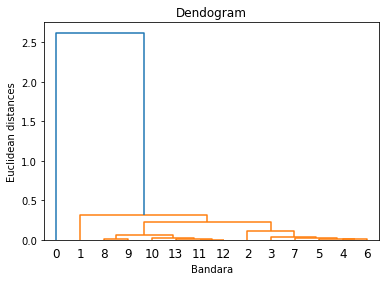

In [30]:
# menggunakan dendogram menentukan angka klaster yang tepat (hierarchical clustering) "ward"
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(y1_scaled, method = "ward"))
plt.title('Dendogram')
plt.xlabel('Bandara')
plt.ylabel('Euclidean distances')
plt.show()

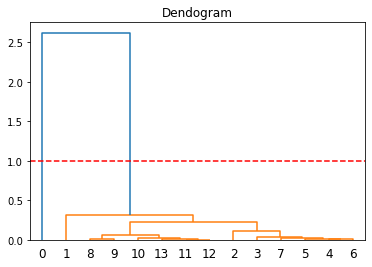

In [31]:
# membuat garis threshold
plt.title('Dendogram')
dendogram = sch.dendrogram(sch.linkage(y1_scaled, method = "ward"))
plt.axhline(y=1, color='r', linestyle='--')

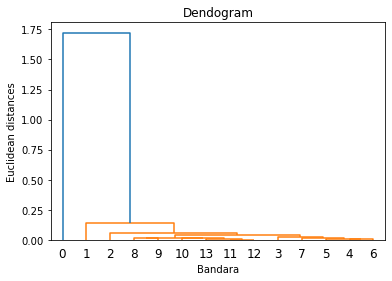

In [32]:
# menggunakan dendogram menentukan angka klaster yang tepat (hierarchical clustering) "single"
dendrogram = sch.dendrogram(sch.linkage(y1_scaled, method = "single"))
plt.title('Dendogram')
plt.xlabel('Bandara')
plt.ylabel('Euclidean distances')
plt.show()

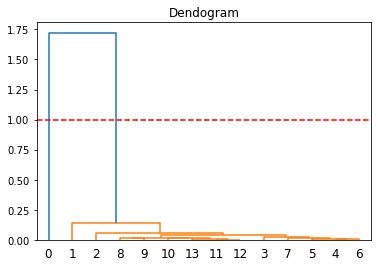

In [33]:
# membuat garis threshold
plt.title('Dendogram')
dendrogram = sch.dendrogram(sch.linkage(y1_scaled, method = "single"))
plt.axhline(y=1, color='r', linestyle='--')

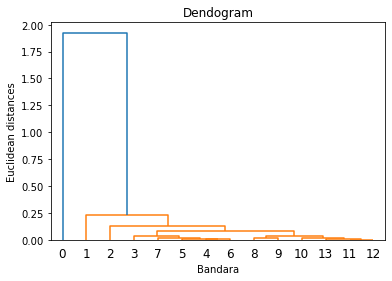

In [34]:
# menggunakan dendogram menentukan angka klaster yang tepat (hierarchical clustering) "average"
dendrogram = sch.dendrogram(sch.linkage(y1_scaled, method = "average"))
plt.title('Dendogram')
plt.xlabel('Bandara')
plt.ylabel('Euclidean distances')
plt.show()

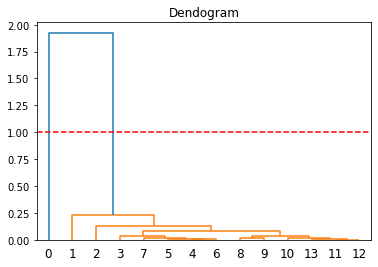

In [35]:
# membuat garis threshold
plt.title('Dendogram')
dendrogram = sch.dendrogram(sch.linkage(y1_scaled, method = "average"))
plt.axhline(y=1, color='r', linestyle='--')

In [36]:
# proses clustering HC "ward"
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y1_hc1 = hc.fit_predict(y1_scaled)
dfward = pd.DataFrame(y1_hc1,
                 columns=['Cluster'])
hasil_klaster = x1.copy()
hasil_klaster['Cluster'] = dfward
hasil_klaster

,Bandara,Revenue Aero 2018,Revenue Non - Aero 2018,Pergerakan Penumpang 2018,Pergerakan Pesawat 2018,Cluster
0,CGK,4.317424e+12,3.595244e+12,65667506.0,463069.0,1
1,KNO,7.063820e+11,2.745030e+11,10455953.0,80354.0,0
2,HLP,2.069661e+11,1.010080e+11,7446544.0,66798.0,0
3,PLM,1.490767e+11,9.280931e+10,5170911.0,45559.0,0
4,PKU,1.284270e+11,7.070546e+10,4139371.0,32936.0,0
5,PDG,1.061211e+11,4.624061e+10,4139952.0,29990.0,0
6,BDO,1.393359e+11,5.725067e+10,3860314.0,31865.0,0
7,PNK,9.779696e+10,6.442331e+10,4208922.0,39655.0,0
8,PGK,3.398775e+10,3.548878e+10,2173097.0,21361.0,0
9,DJB,6.970846e+10,3.330936e+10,1785810.0,17326.0,0


In [37]:
# nilai centeroid 'ward 2018'
from sklearn.neighbors import NearestCentroid
clf = NearestCentroid()
clf.fit(y1_scaled,y1_hc1)
clf.centroids_
c2018bw = pd.DataFrame(clf.centroids_)
print(c2018bw) # array
# balik ke nilai asli
dc2018bw = scaler.inverse_transform(c2018bw)
dc2018bw = pd.DataFrame(dc2018bw,
                        columns=['Revenue Aero 2018', 'Revenue Non - Aero 2018', 
                                 'Pergerakan Penumpang 2018', 'Pergerakan Pesawat 2018'])
dc2018bw

          0         1         2         3
0  0.029358  0.016053  0.049009  0.055469
1  1.000000  1.000000  1.000000  1.000000


,Revenue Aero 2018,Revenue Non - Aero 2018,Pergerakan Penumpang 2018,Pergerakan Pesawat 2018
0,5.210175e+09,5.339024e+09,2.069851e+05,3925.563104
1,7.520816e+10,7.020067e+10,2.085179e+06,36152.000000


In [38]:
# proses clustering HC 'single 2018'
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'single')
y1_hc2 = hc.fit_predict(y1_scaled)
dfsingle = pd.DataFrame(y1_hc2,
                 columns=['Cluster'])
hasil_klaster = x1.copy()
hasil_klaster['Cluster'] = dfsingle
hasil_klaster

,Bandara,Revenue Aero 2018,Revenue Non - Aero 2018,Pergerakan Penumpang 2018,Pergerakan Pesawat 2018,Cluster
0,CGK,4.317424e+12,3.595244e+12,65667506.0,463069.0,1
1,KNO,7.063820e+11,2.745030e+11,10455953.0,80354.0,0
2,HLP,2.069661e+11,1.010080e+11,7446544.0,66798.0,0
3,PLM,1.490767e+11,9.280931e+10,5170911.0,45559.0,0
4,PKU,1.284270e+11,7.070546e+10,4139371.0,32936.0,0
5,PDG,1.061211e+11,4.624061e+10,4139952.0,29990.0,0
6,BDO,1.393359e+11,5.725067e+10,3860314.0,31865.0,0
7,PNK,9.779696e+10,6.442331e+10,4208922.0,39655.0,0
8,PGK,3.398775e+10,3.548878e+10,2173097.0,21361.0,0
9,DJB,6.970846e+10,3.330936e+10,1785810.0,17326.0,0


In [39]:
# nilai centeroid 'single 2018'
from sklearn.neighbors import NearestCentroid
clf = NearestCentroid()
clf.fit(y1_scaled,y1_hc2)
clf.centroids_
c2018bs = pd.DataFrame(clf.centroids_)
print(c2018bs) # array
# balik ke nilai asli
dc2018bs = scaler.inverse_transform(c2018bs)
dc2018bs = pd.DataFrame(dc2018bs,
                        columns=['Revenue Aero 2018', 'Revenue Non - Aero 2018', 
                                 'Pergerakan Penumpang 2018', 'Pergerakan Pesawat 2018'])
dc2018bs

          0         1         2         3
0  0.029358  0.016053  0.049009  0.055469
1  1.000000  1.000000  1.000000  1.000000


,Revenue Aero 2018,Revenue Non - Aero 2018,Pergerakan Penumpang 2018,Pergerakan Pesawat 2018
0,5.210175e+09,5.339024e+09,2.069851e+05,3925.563104
1,7.520816e+10,7.020067e+10,2.085179e+06,36152.000000


In [40]:
# proses clustering HC "average"
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'average')
y1_hc3 = hc.fit_predict(y1_scaled)
dfaverage = pd.DataFrame(y1_hc3,
                 columns=['Cluster'])
hasil_klaster = x1.copy()
hasil_klaster['Cluster'] = dfaverage
hasil_klaster

,Bandara,Revenue Aero 2018,Revenue Non - Aero 2018,Pergerakan Penumpang 2018,Pergerakan Pesawat 2018,Cluster
0,CGK,4.317424e+12,3.595244e+12,65667506.0,463069.0,1
1,KNO,7.063820e+11,2.745030e+11,10455953.0,80354.0,0
2,HLP,2.069661e+11,1.010080e+11,7446544.0,66798.0,0
3,PLM,1.490767e+11,9.280931e+10,5170911.0,45559.0,0
4,PKU,1.284270e+11,7.070546e+10,4139371.0,32936.0,0
5,PDG,1.061211e+11,4.624061e+10,4139952.0,29990.0,0
6,BDO,1.393359e+11,5.725067e+10,3860314.0,31865.0,0
7,PNK,9.779696e+10,6.442331e+10,4208922.0,39655.0,0
8,PGK,3.398775e+10,3.548878e+10,2173097.0,21361.0,0
9,DJB,6.970846e+10,3.330936e+10,1785810.0,17326.0,0


In [41]:
# nilai centeroid 'average 2018'
from sklearn.neighbors import NearestCentroid
clf = NearestCentroid()
clf.fit(y1_scaled,y1_hc3)
clf.centroids_
c2018ba = pd.DataFrame(clf.centroids_)
print(c2018ba) # array
# balik ke nilai asli
dc2018ba = scaler.inverse_transform(c2018ba)
dc2018ba = pd.DataFrame(dc2018ba,
                        columns=['Revenue Aero 2018', 'Revenue Non - Aero 2018', 
                                 'Pergerakan Penumpang 2018', 'Pergerakan Pesawat 2018'])
dc2018ba

          0         1         2         3
0  0.029358  0.016053  0.049009  0.055469
1  1.000000  1.000000  1.000000  1.000000


,Revenue Aero 2018,Revenue Non - Aero 2018,Pergerakan Penumpang 2018,Pergerakan Pesawat 2018
0,5.210175e+09,5.339024e+09,2.069851e+05,3925.563104
1,7.520816e+10,7.020067e+10,2.085179e+06,36152.000000


Clustering HC (Ward) 2019

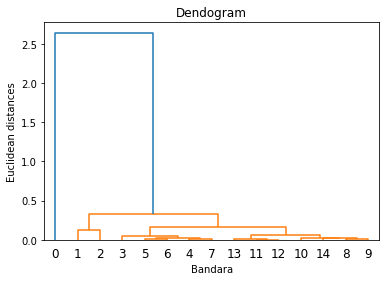

In [42]:
# menggunakan dendogram menentukan angka klaster yang tepat (hierarchical clustering) "ward"
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(y2_scaled, method = "ward"))
plt.title('Dendogram')
plt.xlabel('Bandara')
plt.ylabel('Euclidean distances')
plt.show()

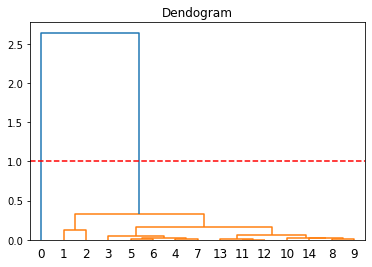

In [43]:
# membuat garis threshold
plt.title('Dendogram')
dendrogram = sch.dendrogram(sch.linkage(y2_scaled, method = "ward"))
plt.axhline(y=1, color='r', linestyle='--')

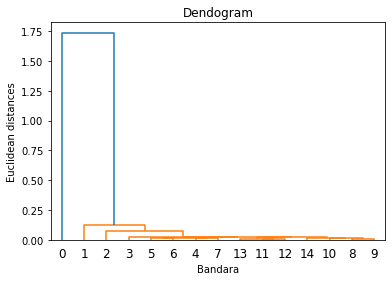

In [44]:
# menggunakan dendogram menentukan angka klaster yang tepat (hierarchical clustering) "single"
dendrogram = sch.dendrogram(sch.linkage(y2_scaled, method = "single"))
plt.title('Dendogram')
plt.xlabel('Bandara')
plt.ylabel('Euclidean distances')
plt.show()

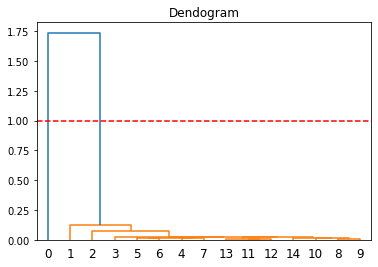

In [45]:
# membuat garis threshold
plt.title('Dendogram')
dendrogram = sch.dendrogram(sch.linkage(y2_scaled, method = "single"))
plt.axhline(y=1, color='r', linestyle='--')

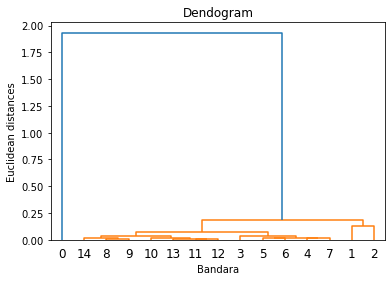

In [46]:
# menggunakan dendogram menentukan angka klaster yang tepat (hierarchical clustering) "average"
dendrogram = sch.dendrogram(sch.linkage(y2_scaled, method = "average"))
plt.title('Dendogram')
plt.xlabel('Bandara')
plt.ylabel('Euclidean distances')
plt.show()

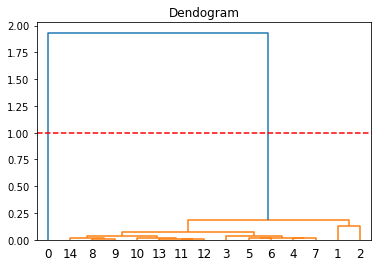

In [47]:
# membuat garis threshold
plt.title('Dendogram')
dendrogram = sch.dendrogram(sch.linkage(y2_scaled, method = "average"))
plt.axhline(y=1, color='r', linestyle='--')

In [48]:
# proses clustering HC 'ward 2019'
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y2_hc1 = hc.fit_predict(y2_scaled)
dfward = pd.DataFrame(y2_hc1,
                columns=['Cluster'])
hasil_klaster = x2.copy()
hasil_klaster['Cluster'] = dfward
hasil_klaster

,Bandara,Revenue Aero 2019,Revenue Non - Aero 2019,Pergerakan Penumpang 2019,Pergerakan Pesawat 2019,Cluster
0,CGK,4.219148e+12,4.049790e+12,54496625.0,390648.0,1
1,KNO,6.544335e+11,3.046860e+11,8064439.0,64691.0,0
2,HLP,1.747462e+11,1.164148e+11,6209227.0,62047.0,0
3,PLM,1.228771e+11,7.715224e+10,4021639.0,37254.0,0
4,PKU,1.440085e+11,6.401090e+10,3160082.0,27453.0,0
5,PDG,9.052373e+10,4.586227e+10,3073710.0,24111.0,0
6,BDO,9.405148e+10,4.999353e+10,2299943.0,24011.0,0
7,PNK,8.541569e+10,5.994605e+10,3268779.0,29755.0,0
8,PGK,3.688218e+10,2.726215e+10,1645440.0,17471.0,0
9,DJB,5.457377e+10,3.042159e+10,1395993.0,15333.0,0


In [49]:
# nilai centeroid 'ward 2019'
from sklearn.neighbors import NearestCentroid
clf = NearestCentroid()
clf.fit(y2_scaled,y2_hc1)
clf.centroids_
c2019bw = pd.DataFrame(clf.centroids_)
print(c2019bw) # array
# balik ke nilai asli
dc2019bw = scaler.inverse_transform(c2019bw)
dc2019bw = pd.DataFrame(dc2019bw,
                        columns=['Revenue Aero 2019', 'Revenue Non - Aero 2019', 
                                 'Pergerakan Penumpang 2019', 'Pergerakan Pesawat 2019' ])
dc2019bw

          0         1         2         3
0  0.025327  0.013225  0.042085  0.053435
1  1.000000  1.000000  1.000000  1.000000


,Revenue Aero 2019,Revenue Non - Aero 2019,Pergerakan Penumpang 2019,Pergerakan Pesawat 2019
0,4.919489e+09,5.152612e+09,1.933100e+05,3856.136228
1,7.520816e+10,7.020067e+10,2.085179e+06,36152.000000


In [50]:
# proses clustering HC 'single 2019'
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'single')
y2_hc2 = hc.fit_predict(y2_scaled)
dfsingle = pd.DataFrame(y2_hc2,
                columns=['Cluster'])
hasil_klaster = x2.copy()
hasil_klaster['Cluster'] = dfsingle
hasil_klaster

,Bandara,Revenue Aero 2019,Revenue Non - Aero 2019,Pergerakan Penumpang 2019,Pergerakan Pesawat 2019,Cluster
0,CGK,4.219148e+12,4.049790e+12,54496625.0,390648.0,1
1,KNO,6.544335e+11,3.046860e+11,8064439.0,64691.0,0
2,HLP,1.747462e+11,1.164148e+11,6209227.0,62047.0,0
3,PLM,1.228771e+11,7.715224e+10,4021639.0,37254.0,0
4,PKU,1.440085e+11,6.401090e+10,3160082.0,27453.0,0
5,PDG,9.052373e+10,4.586227e+10,3073710.0,24111.0,0
6,BDO,9.405148e+10,4.999353e+10,2299943.0,24011.0,0
7,PNK,8.541569e+10,5.994605e+10,3268779.0,29755.0,0
8,PGK,3.688218e+10,2.726215e+10,1645440.0,17471.0,0
9,DJB,5.457377e+10,3.042159e+10,1395993.0,15333.0,0


In [51]:
# nilai centeroid 'single 2019'
from sklearn.neighbors import NearestCentroid
clf = NearestCentroid()
clf.fit(y2_scaled,y2_hc2)
clf.centroids_
c2019bs = pd.DataFrame(clf.centroids_)
print(c2019bs) # array
# balik ke nilai asli
dc2019bs = scaler.inverse_transform(c2019bs)
dc2019bs = pd.DataFrame(dc2019bs,
                        columns=['Revenue Aero 2019', 'Revenue Non - Aero 2019', 
                                 'Pergerakan Penumpang 2019', 'Pergerakan Pesawat 2019'])
dc2019bs

          0         1         2         3
0  0.025327  0.013225  0.042085  0.053435
1  1.000000  1.000000  1.000000  1.000000


,Revenue Aero 2019,Revenue Non - Aero 2019,Pergerakan Penumpang 2019,Pergerakan Pesawat 2019
0,4.919489e+09,5.152612e+09,1.933100e+05,3856.136228
1,7.520816e+10,7.020067e+10,2.085179e+06,36152.000000


In [52]:
# proses clustering HC 'average 2019'
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'average')
y2_hc3 = hc.fit_predict(y2_scaled)
dfaverage = pd.DataFrame(y2_hc3,
                columns=['Cluster'])
hasil_klaster = x2.copy()
hasil_klaster['Cluster'] = dfaverage
hasil_klaster

,Bandara,Revenue Aero 2019,Revenue Non - Aero 2019,Pergerakan Penumpang 2019,Pergerakan Pesawat 2019,Cluster
0,CGK,4.219148e+12,4.049790e+12,54496625.0,390648.0,1
1,KNO,6.544335e+11,3.046860e+11,8064439.0,64691.0,0
2,HLP,1.747462e+11,1.164148e+11,6209227.0,62047.0,0
3,PLM,1.228771e+11,7.715224e+10,4021639.0,37254.0,0
4,PKU,1.440085e+11,6.401090e+10,3160082.0,27453.0,0
5,PDG,9.052373e+10,4.586227e+10,3073710.0,24111.0,0
6,BDO,9.405148e+10,4.999353e+10,2299943.0,24011.0,0
7,PNK,8.541569e+10,5.994605e+10,3268779.0,29755.0,0
8,PGK,3.688218e+10,2.726215e+10,1645440.0,17471.0,0
9,DJB,5.457377e+10,3.042159e+10,1395993.0,15333.0,0


In [53]:
# nilai centeroid 'average 2019'
from sklearn.neighbors import NearestCentroid
clf = NearestCentroid()
clf.fit(y2_scaled,y2_hc3)
clf.centroids_
c2019ba = pd.DataFrame(clf.centroids_)
print(c2019ba) # array
# balik ke nilai asli
dc2019ba = scaler.inverse_transform(c2019ba)
dc2019ba = pd.DataFrame(dc2019ba,
                        columns=['Revenue Aero 2019', 'Revenue Non - Aero 2019', 
                                 'Pergerakan Penumpang 2019', 'Pergerakan Pesawat 2019'])
dc2019ba

          0         1         2         3
0  0.025327  0.013225  0.042085  0.053435
1  1.000000  1.000000  1.000000  1.000000


,Revenue Aero 2019,Revenue Non - Aero 2019,Pergerakan Penumpang 2019,Pergerakan Pesawat 2019
0,4.919489e+09,5.152612e+09,1.933100e+05,3856.136228
1,7.520816e+10,7.020067e+10,2.085179e+06,36152.000000


Clustering HC (Ward) 2020

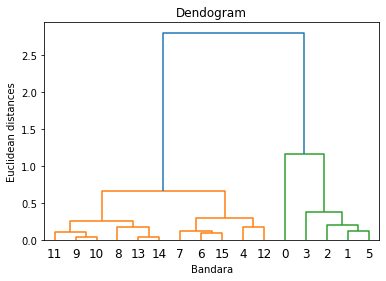

In [54]:
# menggunakan dendogram menentukan angka klaster yang tepat (hierarchical clustering) "ward"
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(y3_scaled, method = "ward"))
plt.title('Dendogram')
plt.xlabel('Bandara')
plt.ylabel('Euclidean distances')
plt.show()

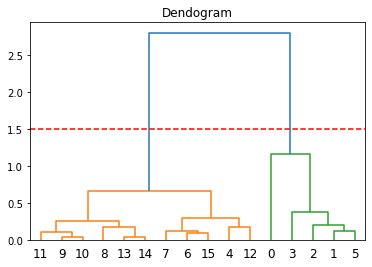

In [55]:
# membuat garis threshold
plt.title('Dendogram')
dendrogram = sch.dendrogram(sch.linkage(y3_scaled, method = "ward"))
plt.axhline(y=1.5, color='r', linestyle='--')

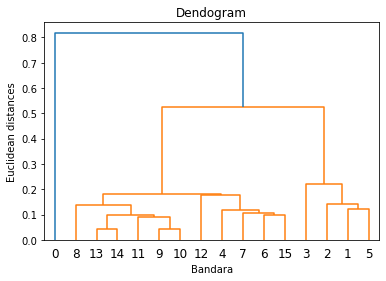

In [56]:
# menggunakan dendogram menentukan angka klaster yang tepat (hierarchical clustering) "single"
dendrogram = sch.dendrogram(sch.linkage(y3_scaled, method = "single"))
plt.title('Dendogram')
plt.xlabel('Bandara')
plt.ylabel('Euclidean distances')
plt.show()

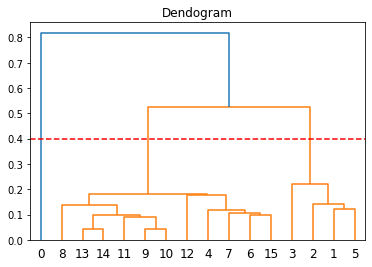

In [57]:
# membuat garis threshold
plt.title('Dendogram')
dendrogram = sch.dendrogram(sch.linkage(y3_scaled, method = "single"))
plt.axhline(y=0.4, color='r', linestyle='--')

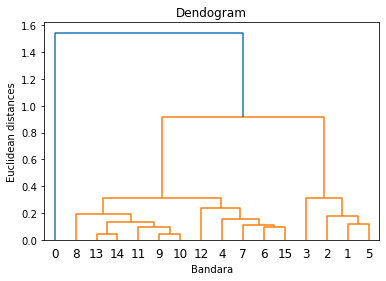

In [58]:
# menggunakan dendogram menentukan angka klaster yang tepat (hierarchical clustering) "average"
dendrogram = sch.dendrogram(sch.linkage(y3_scaled, method = "average"))
plt.title('Dendogram')
plt.xlabel('Bandara')
plt.ylabel('Euclidean distances')
plt.show()

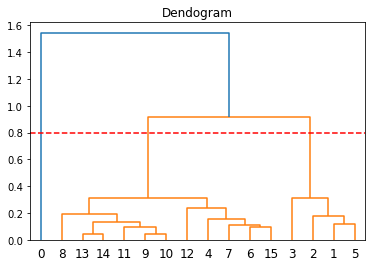

In [59]:
# membuat garis threshold
plt.title('Dendogram')
dendrogram = sch.dendrogram(sch.linkage(y3_scaled, method = "average"))
plt.axhline(y=0.8, color='r', linestyle='--')

In [60]:
# proses clustering HC 'ward 2020'
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y3_hc1 = hc.fit_predict(y3_scaled)
y3_hc1
dfward = pd.DataFrame(y3_hc1,
                columns = ['Cluster'])
print(dfward)
x3s = x3.reset_index()
x3s
x3s = x3s.drop(['index'], axis = 1)
hasil_klaster = x3s.copy()
hasil_klaster['Cluster'] = dfward
hasil_klaster

    Cluster
0         0
1         0
2         0
3         0
4         1
5         0
6         1
7         1
8         1
9         1
10        1
11        1
12        1
13        1
14        1
15        1


,Bandara,Revenue Aero 2020,Revenue Non - Aero 2020,Pergerakan Penumpang 2020,Pergerakan Pesawat 2020,Cluster
0,HLP,75208158668,70200668114,2085179,36152,0
1,PLM,53232904080,42158139805,1445328,17670,0
2,PKU,61784144028,44287072767,1427154,15404,0
3,PDG,43995120381,26045439499,1271716,12286,0
4,BDO,19883366716,20011808672,483295,9130,1
5,PNK,50276663080,35044389976,1434654,16553,0
6,PGK,16118167790,12171853248,673066,9592,1
7,DJB,22468427425,13354608870,557826,7841,1
8,BTJ,13493971043,14178402926,381263,4201,1
9,TNJ,4122742971,4280844786,120021,2433,1


In [61]:
# nilai centeroid 'ward 2020'
from sklearn.neighbors import NearestCentroid
clf = NearestCentroid()
clf.fit(y3_scaled,y3_hc1)
clf.centroids_
c2020bw = pd.DataFrame(clf.centroids_)
print(c2020bw) # array
# balik ke nilai asli
dc2020bw = scaler.inverse_transform(c2020bw)
dc2020bw = pd.DataFrame(dc2020bw,
                        columns=['Revenue Aero 2020', 'Revenue Non - Aero 2020',
                                 'Pergerakan Penumpang 2020', 'Pergerakan Pesawat 2020'])
dc2020bw

          0         1         2         3
0  0.746118  0.595668  0.720316  0.515255
1  0.116407  0.101693  0.134930  0.110410


,Revenue Aero 2020,Revenue Non - Aero 2020,Pergerakan Penumpang 2020,Pergerakan Pesawat 2020
0,5.689940e+10,4.354714e+10,1.532806e+06,19613.000000
1,1.148771e+10,1.098441e+10,3.766788e+05,5800.090909


In [62]:
# proses clustering HC 'single 2020'
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'single')
y3_hc2 = hc.fit_predict(y3_scaled)
dfsingle = pd.DataFrame(y3_hc2,
                columns=['Cluster'])
print(dfsingle)
x3s = x3.reset_index()
x3s
x3s = x3s.drop(['index'], axis = 1)
hasil_klaster = x3s.copy()
hasil_klaster['Cluster'] = dfsingle
hasil_klaster

    Cluster
0         1
1         0
2         0
3         0
4         2
5         0
6         2
7         2
8         2
9         2
10        2
11        2
12        2
13        2
14        2
15        2


,Bandara,Revenue Aero 2020,Revenue Non - Aero 2020,Pergerakan Penumpang 2020,Pergerakan Pesawat 2020,Cluster
0,HLP,75208158668,70200668114,2085179,36152,1
1,PLM,53232904080,42158139805,1445328,17670,0
2,PKU,61784144028,44287072767,1427154,15404,0
3,PDG,43995120381,26045439499,1271716,12286,0
4,BDO,19883366716,20011808672,483295,9130,2
5,PNK,50276663080,35044389976,1434654,16553,0
6,PGK,16118167790,12171853248,673066,9592,2
7,DJB,22468427425,13354608870,557826,7841,2
8,BTJ,13493971043,14178402926,381263,4201,2
9,TNJ,4122742971,4280844786,120021,2433,2


In [63]:
# nilai centeroid 'single 2020'
from sklearn.neighbors import NearestCentroid
clf = NearestCentroid()
clf.fit(y3_scaled,y3_hc2)
clf.centroids_
c2020bs = pd.DataFrame(clf.centroids_)
print(c2020bs) # array
# balik ke nilai asli
dc2020bs = scaler.inverse_transform(c2020bs)
dc2020bs = pd.DataFrame(dc2020bs,
                        columns=['Revenue Aero 2020', 'Revenue Non - Aero 2020', 
                                 'Pergerakan Penumpang 2020', 'Pergerakan Pesawat 2020'])
dc2020bs

          0         1         2         3
0  0.682647  0.494584  0.650394  0.394069
1  1.000000  1.000000  1.000000  1.000000
2  0.116407  0.101693  0.134930  0.110410


,Revenue Aero 2020,Revenue Non - Aero 2020,Pergerakan Penumpang 2020,Pergerakan Pesawat 2020
0,5.232221e+10,3.688376e+10,1.394713e+06,15478.250000
1,7.520816e+10,7.020067e+10,2.085179e+06,36152.000000
2,1.148771e+10,1.098441e+10,3.766788e+05,5800.090909


In [64]:
# proses clustering HC 'average 2020'
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'average')
y3_hc3 = hc.fit_predict(y3_scaled)
dfaverage = pd.DataFrame(y3_hc3,
                columns=['Cluster'])
print(dfaverage)
x3s = x3.reset_index()
x3s
x3s = x3s.drop(['index'], axis = 1)
hasil_klaster = x3s.copy()
hasil_klaster['Cluster'] = dfaverage
hasil_klaster

    Cluster
0         1
1         0
2         0
3         0
4         2
5         0
6         2
7         2
8         2
9         2
10        2
11        2
12        2
13        2
14        2
15        2


,Bandara,Revenue Aero 2020,Revenue Non - Aero 2020,Pergerakan Penumpang 2020,Pergerakan Pesawat 2020,Cluster
0,HLP,75208158668,70200668114,2085179,36152,1
1,PLM,53232904080,42158139805,1445328,17670,0
2,PKU,61784144028,44287072767,1427154,15404,0
3,PDG,43995120381,26045439499,1271716,12286,0
4,BDO,19883366716,20011808672,483295,9130,2
5,PNK,50276663080,35044389976,1434654,16553,0
6,PGK,16118167790,12171853248,673066,9592,2
7,DJB,22468427425,13354608870,557826,7841,2
8,BTJ,13493971043,14178402926,381263,4201,2
9,TNJ,4122742971,4280844786,120021,2433,2


In [65]:
# nilai centeroid 'average 2020'
from sklearn.neighbors import NearestCentroid
clf = NearestCentroid()
clf.fit(y3_scaled,y3_hc3)
clf.centroids_
c2020ba = pd.DataFrame(clf.centroids_)
print(c2020ba) # array
# balik ke nilai asli
dc2020ba = scaler.inverse_transform(c2020ba)
dc2020ba = pd.DataFrame(dc2020ba,
                        columns=['Revenue Aero 2020', 'Revenue Non - Aero 2020', 
                                 'Pergerakan Penumpang 2020', 'Pergerakan Pesawat 2020'])
dc2020ba

          0         1         2         3
0  0.682647  0.494584  0.650394  0.394069
1  1.000000  1.000000  1.000000  1.000000
2  0.116407  0.101693  0.134930  0.110410


,Revenue Aero 2020,Revenue Non - Aero 2020,Pergerakan Penumpang 2020,Pergerakan Pesawat 2020
0,5.232221e+10,3.688376e+10,1.394713e+06,15478.250000
1,7.520816e+10,7.020067e+10,2.085179e+06,36152.000000
2,1.148771e+10,1.098441e+10,3.766788e+05,5800.090909


In [66]:
# radara chart di excel

Validasi Hasil Clustering

2018

In [67]:
# KMeans 2018
